# Contributor Experience vs. Impact Analysis

This notebook provides a focused analysis on the relationship between contributor experience (years in the repository) and their impact on the codebase.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set plot style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [20]:
# Load the contributor dataset
df = pd.read_csv('data/contributor_impact_dataset.csv')

# Display basic statistics
print(f"Total contributors: {len(df)}")
print(f"Date range: {df['first_contribution'].min()} to {df['last_contribution'].max()}")
print(f"Total commits: {df['total_commits'].sum():,}")
print(f"Total code changes: {df['total_additions'].sum():,} additions, {df['total_deletions'].sum():,} deletions")

Total contributors: 1166
Date range: 2008-07-11 06:34:50+00:00 to 2025-09-01 09:49:31+00:00
Total commits: 30,141
Total code changes: 3,946,993 additions, 2,309,704 deletions


## Top Contributors by Impact

In [21]:
# Get top 15 contributors by impact score
top_impact = df.sort_values('impact_score', ascending=False).head(15)

# Display their key metrics
top_impact[['author_name', 'years_since_first_commit', 'active_years', 'total_commits', 
            'total_additions', 'total_deletions', 'impact_score']].reset_index(drop=True)

,author_name,years_since_first_commit,active_years,total_commits,total_additions,total_deletions,impact_score
0,Arjen Poutsma,16.865161,15.693361,1565,762326,100254,1584984.0
1,Juergen Hoeller,16.856947,16.829569,7738,545680,599552,1437405.0
2,Rossen Stoyanchev,16.492813,15.608487,3804,476724,231816,1092431.2
3,Sam Brannen,16.350445,16.336756,5692,335078,229726,818895.0
4,Chris Beams,16.772074,5.965777,911,270734,202603,651702.7
5,Phillip Webb,13.199179,13.136208,648,230372,205098,569584.2
6,Brian Clozel,11.939767,11.934292,1275,169638,124190,408680.6
7,Rob Winch,13.149897,11.865845,127,142337,140394,356177.8
8,Andy Clement,17.059548,12.065708,259,121776,81377,285830.3
9,Stephane Nicoll,11.649555,10.458590,941,114492,29888,249764.8


## Most Experienced Contributors

In [22]:
# Get top 15 contributors by years of experience
top_experience = df.sort_values('years_since_first_commit', ascending=False).head(15)

# Display their key metrics
top_experience[['author_name', 'years_since_first_commit', 'active_years', 'total_commits', 
                'impact_score']].reset_index(drop=True)

,author_name,years_since_first_commit,active_years,total_commits,impact_score
0,Ben Hale,17.144422,2.116359,31,4541.0
1,Andy Clement,17.059548,12.065708,259,285830.3
2,Arjen Poutsma,16.865161,15.693361,1565,1584984.0
3,Scott Andrews,16.856947,3.597536,39,7999.5
4,Juergen Hoeller,16.856947,16.829569,7738,1437405.0
5,Thomas Risberg,16.818617,8.164271,157,243804.8
6,Chris Beams,16.772074,5.965777,911,651702.7
7,Costin Leau,16.769336,3.110198,172,40382.7
8,Christian Dupuis,16.758385,4.950034,22,1128.9
9,Ramnivas Laddad,16.605065,1.727584,24,7144.8


## Visualizing Experience vs. Impact

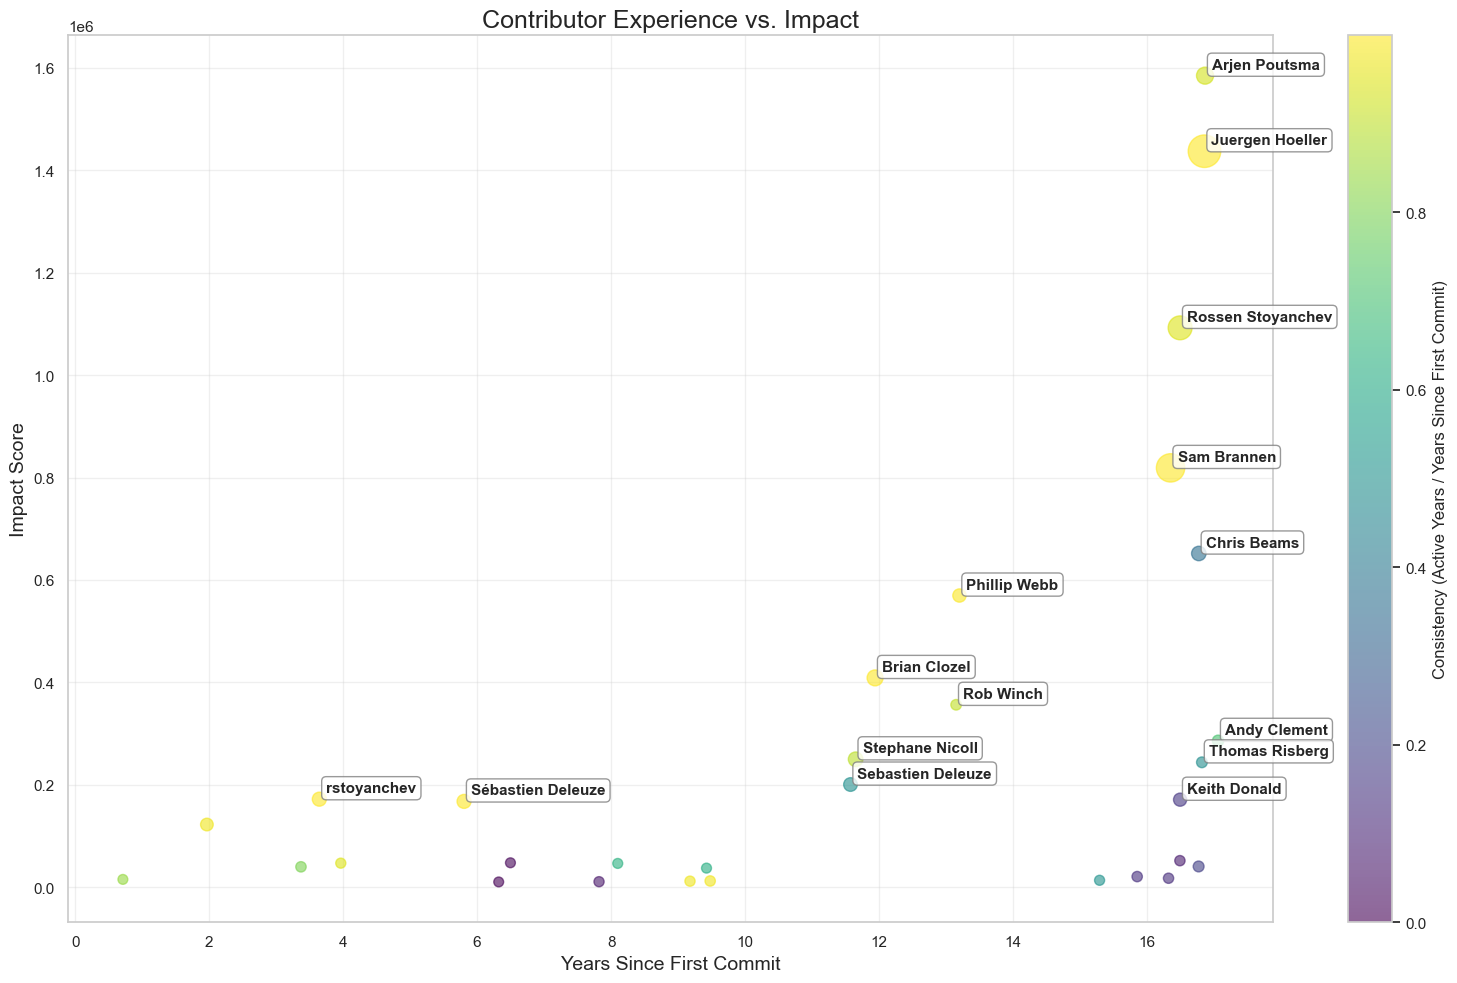

In [23]:
# Filter out contributors with very low impact for better visualization
filtered_df = df[df['impact_score'] > 10000]

# Create a scatter plot of experience vs. impact
plt.figure(figsize=(16, 10))

# Use total_commits for point size
sizes = filtered_df['total_commits'] / filtered_df['total_commits'].max() * 500 + 50

# Create scatter plot
scatter = plt.scatter(
    filtered_df['years_since_first_commit'], 
    filtered_df['impact_score'],
    s=sizes,
    alpha=0.6,
    c=filtered_df['active_years'] / filtered_df['years_since_first_commit'].clip(lower=0.001),  # Color by consistency
    cmap='viridis'
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Consistency (Active Years / Years Since First Commit)')

# Add labels for top contributors
for _, row in filtered_df.nlargest(15, 'impact_score').iterrows():
    plt.annotate(
        row['author_name'], 
        (row['years_since_first_commit'], row['impact_score']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    )

plt.title('Contributor Experience vs. Impact', fontsize=18)
plt.xlabel('Years Since First Commit', fontsize=14)
plt.ylabel('Impact Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Impact per Year of Experience

In [24]:
# Calculate impact per year of active contribution
# Avoid division by zero by using a minimum of 0.5 years
df['impact_per_active_year'] = df['impact_score'] / df['active_years'].clip(lower=0.5)

# Get top 15 contributors by impact per active year (for those with at least 1 year of activity)
top_efficiency = df[df['active_years'] >= 1].sort_values('impact_per_active_year', ascending=False).head(15)

# Display their key metrics
top_efficiency[['author_name', 'years_since_first_commit', 'active_years', 'total_commits', 
                'impact_score', 'impact_per_active_year']].reset_index(drop=True)

,author_name,years_since_first_commit,active_years,total_commits,impact_score,impact_per_active_year
0,Chris Beams,16.772074,5.965777,911,651702.7,109240.207056
1,Arjen Poutsma,16.865161,15.693361,1565,1584984.0,100997.105024
2,Juergen Hoeller,16.856947,16.829569,7738,1437405.0,85409.496706
3,Rossen Stoyanchev,16.492813,15.608487,3804,1092431.2,69989.562498
4,Keith Donald,16.492813,2.518823,615,170831.4,67821.922663
5,Stéphane Nicoll,1.965777,1.916496,510,122270.9,63799.208893
6,Sam Brannen,16.350445,16.336756,5692,818895.0,50125.925716
7,rstoyanchev,3.644079,3.630390,806,171802.9,47323.536369
8,Mark Pollack,16.490075,1.174538,75,51696.8,44014.583217
9,Phillip Webb,13.199179,13.136208,648,569584.2,43359.864329


## Visualizing Top Contributors by Impact and Experience

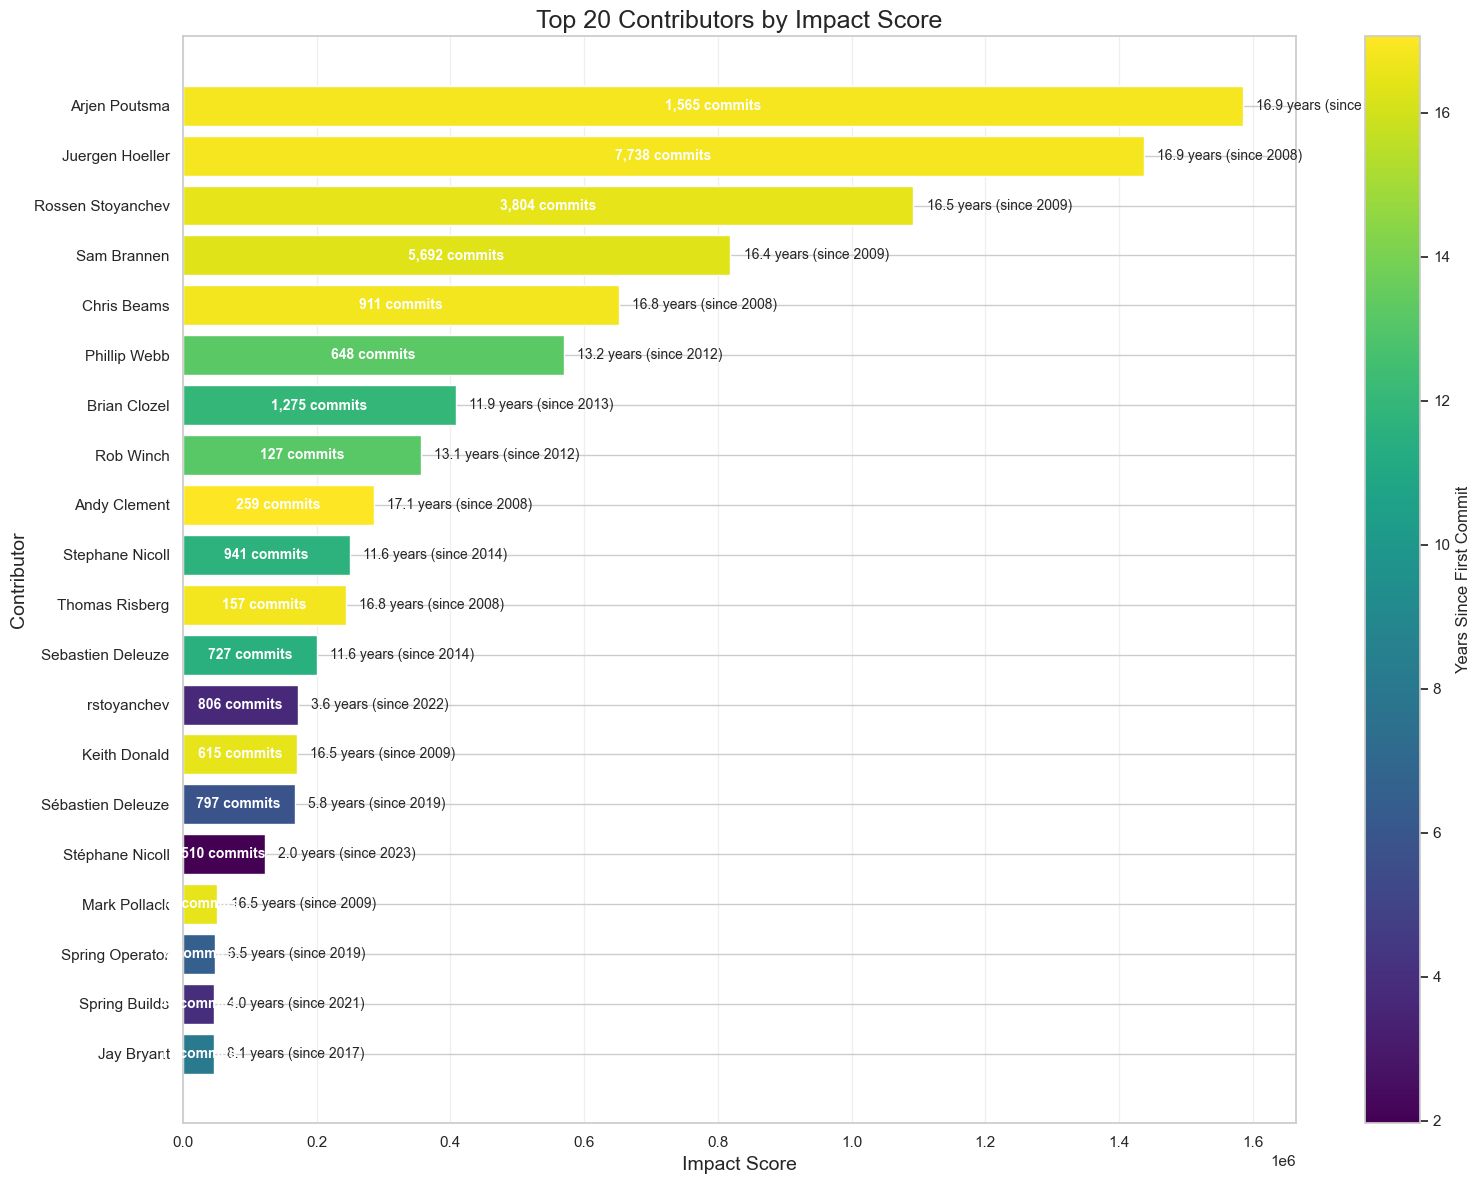

In [25]:
# Get top 20 contributors by impact
top20 = df.nlargest(20, 'impact_score')

# Create a horizontal bar chart showing impact and experience
fig, ax = plt.subplots(figsize=(16, 12))

# Sort by impact score
top20 = top20.sort_values('impact_score')

# Create color mapping based on experience
norm = plt.Normalize(top20['years_since_first_commit'].min(), top20['years_since_first_commit'].max())
colors = plt.cm.viridis(norm(top20['years_since_first_commit']))

# Plot horizontal bars
bars = ax.barh(top20['author_name'], top20['impact_score'], color=colors)

# Add experience years as text
for i, (_, row) in enumerate(top20.iterrows()):
    ax.text(
        row['impact_score'] + 20000,
        i,
        f"{row['years_since_first_commit']:.1f} years (since {pd.to_datetime(row['first_contribution']).year})",
        va="center",
        fontsize=10
    )
    
    # Add commit count
    ax.text(
        row['impact_score'] / 2,
        i,
        f"{int(row['total_commits']):,} commits",
        va="center",
        ha="center",
        color="white",
        fontweight="bold",
        fontsize=10
    )

# Add a colorbar - FIXED: Added ax parameter to colorbar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # Added ax parameter to fix the error
cbar.set_label('Years Since First Commit')

ax.set_title("Top 20 Contributors by Impact Score", fontsize=18)
ax.set_xlabel("Impact Score", fontsize=14)
ax.set_ylabel("Contributor", fontsize=14)
ax.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

## Yearly Contribution Patterns for Top Contributors

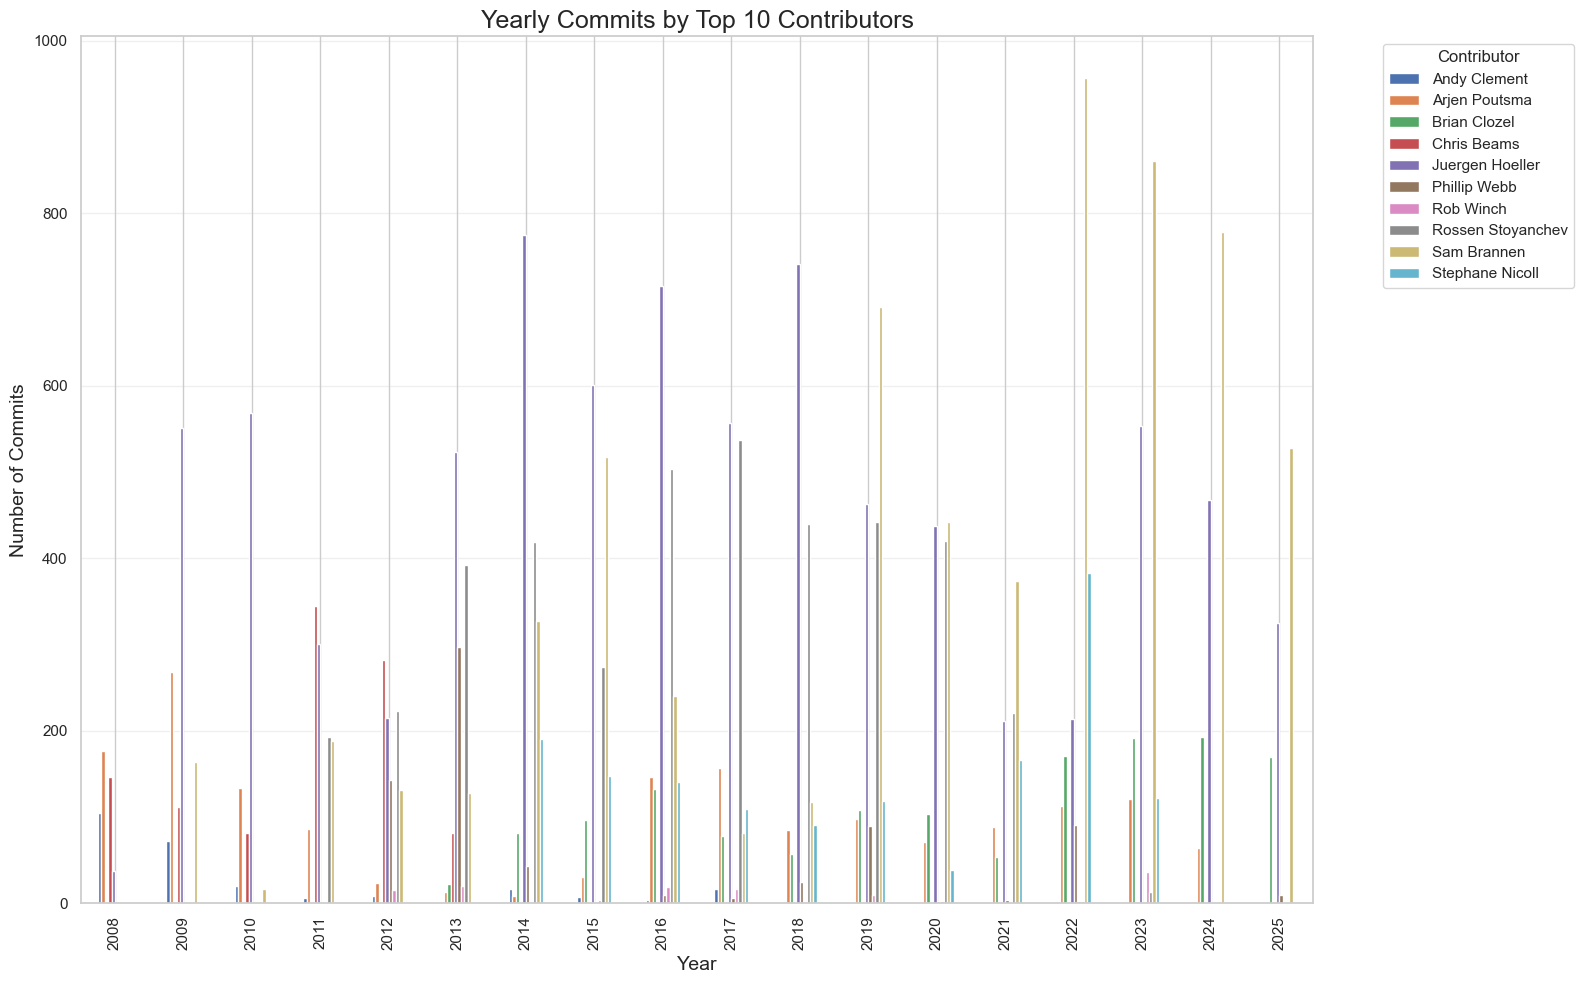

In [26]:
# Load the git commit data
git_commit_pd = pd.read_csv("data/git_commits.csv", sep="##", header=None,
                      names=["sha","date","author_name","author_email","subject"],
                      engine="python")

# Date type data standardization
git_commit_pd["date"] = pd.to_datetime(git_commit_pd["date"], utc=True)
git_commit_pd["year"] = git_commit_pd["date"].dt.year

# Get top 10 contributors by impact
top10_names = df.nlargest(10, 'impact_score')['author_name'].tolist()

# Filter for top contributors
top10_commits = git_commit_pd[git_commit_pd['author_name'].isin(top10_names)]

# Count commits by year and author
yearly_commits = top10_commits.groupby(['year', 'author_name']).size().unstack().fillna(0)

# Plot yearly commits for top contributors
plt.figure(figsize=(16, 10))
yearly_commits.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Yearly Commits by Top 10 Contributors', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Commits', fontsize=14)
plt.legend(title='Contributor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Key Insights

1. **Impact Leaders**: The analysis reveals the most impactful contributors based on our weighted scoring system that considers commits, code changes, and files modified.

2. **Experience vs. Impact Relationship**: We can observe how years of experience correlates with overall impact. Some contributors achieve high impact despite relatively short tenure, while others maintain consistent contributions over many years.

3. **Contribution Efficiency**: By examining impact per active year, we can identify which contributors have the highest rate of meaningful contributions during their active periods.

4. **Contribution Patterns Over Time**: The yearly commit patterns show how different contributors' involvement has evolved over the repository's history, revealing periods of high activity and potential shifts in project leadership.

5. **Consistency Factor**: The visualization highlights how consistently active contributors are throughout their tenure, which is an important factor in understanding their overall influence on the project.